# Validation of RBSA 2014 discrete data through loadshape comparison

Input: 
- model must use implicit appliance definitions
- paneldump of the model using 1 hr interval (3600) to ensure energy output

Import the panel dump 

In [1]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib as matplotlib
import numpy as np
from datetime import datetime
import time
import glmptime as glmptime

panel_dump = "paneldump/paneldump_Full_Electric"
loadshape = {}
with open(panel_dump, newline='') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(fr)
    for row in fr :
        print(row)
        row_3 = float(row[3])
        if not loadshape : # populating the first line
            loadshape[row[0]] = {row[1]:{row[2]:row_3}}
        else : # any additional lines 
            if row[0] in loadshape : # Checking if the timestamp is already present 
                if row[1] in loadshape[row[0]].keys() :# Checking if house is present 
                    if row[2] not in loadshape[row[0]][row[1]].keys() : # Check that the appliance is not already in
                        loadshape[row[0]][row[1]].update({row[2]:row_3})# Add another appliance 
                    else : 
                        print('ERROR duplicate appliance', loadshape[row[2]] ,'entry in the same house', loadshape[row[1]])
                else : # if house is not already in the dict
                    loadshape[row[0]][row[1]]={row[2]:row_3}
            else : # if new timestamp 
                loadshape[row[0]] = {row[1]:{row[2]:row_3}}

['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'HVAC', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'LIGHTS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'PLUGS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'DISHWASHER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'MICROWAVE', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'FREEZER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'REFRIGERATOR', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'RANGE', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'WATERHEATER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'CLOTHESWASHER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_3_ELEC', 'DRYER', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'HVAC', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'LIGHTS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'PLUGS', '0', '0']
['2018-01-15 00:00:00 PST', 'house_2_ELEC', 'DISHWASHER', '0', '0']
['2018-01-15 00:00

['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'MICROWAVE', '302.4', '308.51']
['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'FREEZER', '341.996', '165.636']
['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'REFRIGERATOR', '748.784', '362.653']
['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'RANGE', '705.436', '437.19']
['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'WATERHEATER', '5376', '0']
['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'CLOTHESWASHER', '0.5', '0.242161']
['2018-01-18 18:00:00 PST', 'house_2_ELEC', 'DRYER', '11518.1', '1641.24']
['2018-01-18 18:00:00 PST', 'house_1_ELEC', 'HVAC', '360.459', '317.895']
['2018-01-18 18:00:00 PST', 'house_1_ELEC', 'LIGHTS', '575.995', '144.358']
['2018-01-18 18:00:00 PST', 'house_1_ELEC', 'PLUGS', '2728.62', '1321.53']
['2018-01-18 18:00:00 PST', 'house_1_ELEC', 'DISHWASHER', '0', '0']
['2018-01-18 18:00:00 PST', 'house_1_ELEC', 'MICROWAVE', '302.4', '308.51']
['2018-01-18 18:00:00 PST', 'house_1_ELEC', 'FREEZER', '341.995', '165.635']
['2018-01-18 18:00

In [2]:
print(loadshape)

{'2018-01-15 00:00:00 PST': {'house_3_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_2_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, 'house_1_ELEC': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}}, '2018-01-15 01:00:00 PST': {'house_3_ELEC': {'HVAC': 0.0, 'LIGHTS': 283.619, 'PLUGS': 1343.52, 'DISHWASHER': 0.0, 'MICROWAVE': 115.2, 'FREEZER': 524.395, 'REFRIGERATOR': 556.794, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.5, 'DRYER': 11519.1}, 'house_2_ELEC': {'HVAC': 0.0, 'LIGHTS': 283.619, 'PLUGS': 1343.52, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 

In [3]:
loadshape_per_appliance = {} 

# {time : {hvac:sum, lights:sum,...etc }
for t in loadshape.keys() :
    e_val = 0 #resetting energy value at each time stamp 
    appl_dict = [] # resetting the appliance dict at each timestamp
    for h in loadshape[t].keys() : 
        appl_dict.append(loadshape[t][h]) 
    c = Counter()
    for a in appl_dict:
        c.update(a)
    loadshape_per_appliance[t]=dict(c)
print(loadshape_per_appliance) #sum of energy per appliance per time step


{'2018-01-15 00:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 0.0, 'PLUGS': 0.0, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 0.0, 'REFRIGERATOR': 0.0, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 0.0, 'DRYER': 0.0}, '2018-01-15 01:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 850.855, 'PLUGS': 4030.56, 'DISHWASHER': 0.0, 'MICROWAVE': 244.8, 'FREEZER': 1196.989, 'REFRIGERATOR': 1689.581, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 1.5, 'DRYER': 34557.2}, '2018-01-15 02:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 779.377, 'PLUGS': 3691.9800000000005, 'DISHWASHER': 0.0, 'MICROWAVE': 0.0, 'FREEZER': 569.995, 'REFRIGERATOR': 671.994, 'RANGE': 0.0, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 1.5, 'DRYER': 34557.0}, '2018-01-15 03:00:00 PST': {'HVAC': 0.0, 'LIGHTS': 752.7, 'PLUGS': 3565.62, 'DISHWASHER': 0.0, 'MICROWAVE': 50.4, 'FREEZER': 980.3910000000001, 'REFRIGERATOR': 2169.578, 'RANGE': 33.5968, 'WATERHEATER': 0.0, 'CLOTHESWASHER': 1.5, 'DRYER': 30909.13}, '2018-01-15 04:00:00 PST': {'HVAC': 3785.47, 'LIG

Breaking the dictionary down into lists for plotting

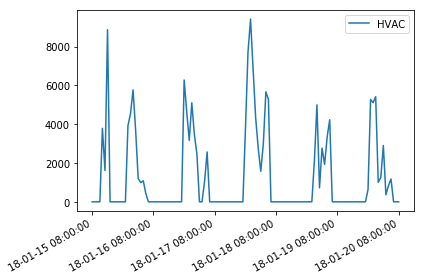

FileNotFoundError: [Errno 2] No such file or directory: 'output_loadshapes/loadshape_HVAC.png'

<Figure size 432x288 with 0 Axes>

In [5]:
plt_list = []
for t,val in loadshape_per_appliance.items() : 
    for a, e in val.items() : 
        plt_list.append([t,e,a])

appliance_list = []
for l in plt_list : 
    if l[2] not in appliance_list :
        appliance_list.append(l[2])
   
for a in appliance_list : 
    x = []
    y = []
    for l in plt_list : 
        if a in l : 
            x.append(glmptime.glmptime(l[0]))
            y.append(l[1])
    plt.plot(x,y,label=a)  
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    myFmt = md.DateFormatter('%y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.legend()
    plt.tight_layout()
    tmp = plt.gcf() # get current figure
    plt.show()
    plt.draw()
    tmp.savefig("output_loadshapes/loadshape_" + a + ".png")

# plt.close()

# plt.rcParams['figure.figsize'] = [30, 25]
# plt.show()